In [1]:
import pennylane as qml
import numpy as np
from quantum_wavelets.permutations import PerfectShuffle, BitReversal

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def test_shuffle():
    qml.BasisState(np.array([1, 0, 0]), wires=[0,1,2])
    PerfectShuffle(wires=[0,1,2])
    return qml.state()

@qml.qnode(dev)
def test_reverse():
    qml.BasisState(np.array([1, 0, 0]), wires=[0,1,2])
    BitReversal(wires=[0,1,2])
    return qml.state()

print("Perfect shuffle:", test_shuffle())
print("Bit reversal:", test_reverse())


Perfect shuffle: [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
Bit reversal: [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


C:\Users\Deepak Gupta\AppData\Roaming\Python\Python311\site-packages\pennylane\__init__.py:212: PennyLaneDeprecationWarning: PennyLane v0.44 has dropped maintainence support for NumPy < 2.0.0. You have version 1.26.4 installed. Future versions of PennyLane will not work with NumPy<2.0. Please consider upgrading NumPy using `python -m pip install numpy --upgrade`. 
  warnings.warn(


In [2]:
from quantum_wavelets.permutations import PerfectShuffle, BitReversal
print(PerfectShuffle, BitReversal)


<class 'quantum_wavelets.permutations.PerfectShuffle'> <class 'quantum_wavelets.permutations.BitReversal'>


In [3]:
from quantum_wavelets.haar import HaarWavelet
print(HaarWavelet)


<class 'quantum_wavelets.haar.HaarWavelet'>


In [4]:
import pennylane as qml
import numpy as np
from quantum_wavelets.haar import HaarWavelet

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def test_haar():
    qml.BasisState(np.array([1, 0, 0]), wires=[0,1,2])
    HaarWavelet(wires=[0,1,2])
    return qml.state()

print(test_haar())


[ 0.35355339+0.j -0.35355339+0.j  0.        +0.j  0.5       +0.j
  0.        +0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]


In [1]:
import numpy as np
import pennylane as qml
from quantum_wavelets.haar import HaarWavelet

U = qml.matrix(HaarWavelet(wires=[0,1,2]))
print(np.allclose(U.conj().T @ U, np.eye(8)))


True


C:\Users\Deepak Gupta\AppData\Roaming\Python\Python311\site-packages\pennylane\__init__.py:212: PennyLaneDeprecationWarning: PennyLane v0.44 has dropped maintainence support for NumPy < 2.0.0. You have version 1.26.4 installed. Future versions of PennyLane will not work with NumPy<2.0. Please consider upgrading NumPy using `python -m pip install numpy --upgrade`. 
  warnings.warn(


In [1]:
import numpy as np
import pennylane as qml
from quantum_wavelets.daubechies_d4 import DaubechiesD4

dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit():
    qml.BasisState(np.array([0, 1, 0]), wires=[0, 1, 2])
    DaubechiesD4(wires=[0, 1, 2])
    return qml.state()

state = circuit()
print("Norm:", np.linalg.norm(state))


Norm: 0.9999999999999997


C:\Users\Deepak Gupta\AppData\Roaming\Python\Python311\site-packages\pennylane\__init__.py:212: PennyLaneDeprecationWarning: PennyLane v0.44 has dropped maintainence support for NumPy < 2.0.0. You have version 1.26.4 installed. Future versions of PennyLane will not work with NumPy<2.0. Please consider upgrading NumPy using `python -m pip install numpy --upgrade`. 
  warnings.warn(


(<Figure size 800x400 with 1 Axes>, <Axes: >)

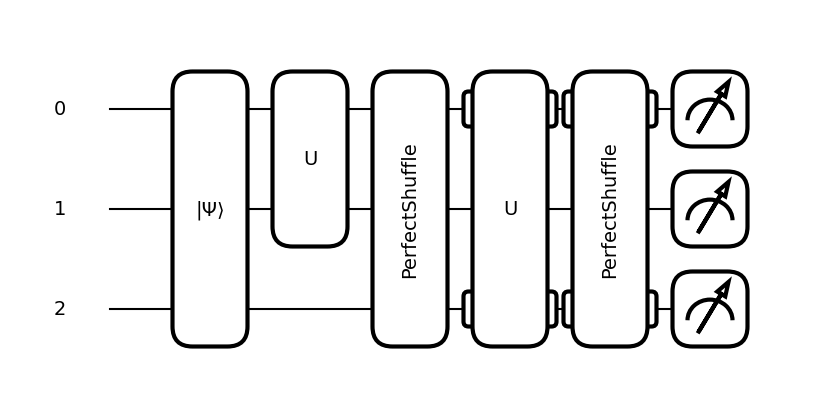

In [2]:
qml.draw_mpl(circuit, level="device")()


In [3]:
@qml.qnode(dev)
def d4_only():
    DaubechiesD4(wires=[0, 1, 2])
    return qml.state()

U = qml.matrix(d4_only)()
print("Unitary:", np.allclose(U.conj().T @ U, np.eye(8)))


Unitary: True
